In [1]:
%matplotlib inline
import morphs
import numpy as np
import matplotlib.pyplot as plt

/usr/local/anaconda/envs/morphs36/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/usr/local/anaconda/envs/morphs36/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
accuracies, cluster_accuracies = morphs.load.cluster_accuracies()
good_recs = morphs.data.accuracies.good_recs()

In [3]:
all_accuracies = np.concatenate(
    [
        cluster_accuracies[block_path]["accuracy"].values
        for block_path in cluster_accuracies
    ]
)

In [4]:
all_accuracies.sort()

In [5]:
CUTOFF = 0.6

In [6]:
total = len(all_accuracies)
survived, eliminated = np.sum(all_accuracies >= CUTOFF), np.sum(all_accuracies < CUTOFF)

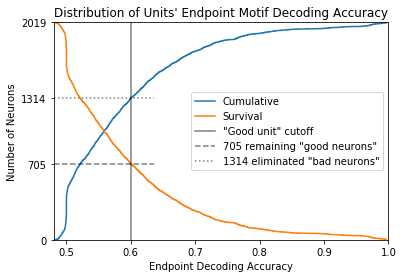

In [7]:
morphs.plot.cumulative_distribution(all_accuracies, label="Cumulative")
morphs.plot.cumulative_distribution(all_accuracies, survival=True, label="Survival")
plt.axvline(CUTOFF, color="k", alpha=0.5, label='"Good unit" cutoff')
plt.axhline(
    survived,
    color="k",
    alpha=0.5,
    linestyle="--",
    xmax=0.3,
    label='{} remaining "good neurons"'.format(survived),
)
plt.axhline(
    eliminated,
    color="k",
    alpha=0.5,
    linestyle=":",
    xmax=0.3,
    label='{} eliminated "bad neurons"'.format(eliminated),
)
plt.legend()
plt.ylabel("Number of Neurons")
plt.xlabel("Endpoint Decoding Accuracy")
plt.xlim(all_accuracies[0], 1)
plt.ylim(0, total)
plt.yticks([0, survived, eliminated, total])
plt.title("Distribution of Units' Endpoint Motif Decoding Accuracy")
morphs.plot.savefig(plt.gcf(), "endpoint_decoding")

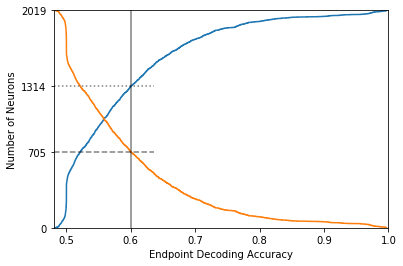

In [8]:
morphs.plot.cumulative_distribution(all_accuracies, label="Cumulative")
morphs.plot.cumulative_distribution(all_accuracies, survival=True, label="Survival")
plt.axvline(CUTOFF, color="k", alpha=0.5, label='"Good unit" cutoff')
plt.axhline(
    survived,
    color="k",
    alpha=0.5,
    linestyle="--",
    xmax=0.3,
    label='{} remaining "good neurons"'.format(survived),
)
plt.axhline(
    eliminated,
    color="k",
    alpha=0.5,
    linestyle=":",
    xmax=0.3,
    label='{} eliminated "bad neurons"'.format(eliminated),
)
# plt.legend()
plt.ylabel("Number of Neurons")
plt.xlabel("Endpoint Decoding Accuracy")
plt.xlim(all_accuracies[0], 1)
plt.ylim(0, total)
plt.yticks([0, survived, eliminated, total])
# plt.title("Distribution of Units' Endpoint Motif Decoding Accuracy")
morphs.plot.savefig(plt.gcf(), "endpoint_decoding_fig")